<a href="https://colab.research.google.com/github/Jsk10101/PlanetarySci-Phys5205/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports, Mounting Data, and gathering Datafile

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import astropy.units as u
import astropy.constants as c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First import pandas and datafile

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College/Junior/Planetary Science/Project 3/solar_spectrum.txt',
                 sep = ' ', names = ['wavelength', 'flux'])

In [ ]:
print(df)

      wavelength  flux
0       5866.000  9907
1       5866.010  9905
2       5866.020  9902
3       5866.032  9898
4       5866.042  9894
...          ...   ...
4596    5915.956  9683
4597    5915.966  9668
4598    5915.978  9649
4599    5915.988  9639
4600    5916.000  9637

[4601 rows x 2 columns]


# 1. Measuring Equivalent Width of Sodium Doublet Lines

In this section, we will be exploring the sodium doublet lines within the Sun, and taking the equivalent width of one of these sodium.

Below is the raw Solar Spectrum with No Normalization or Limits set on the data

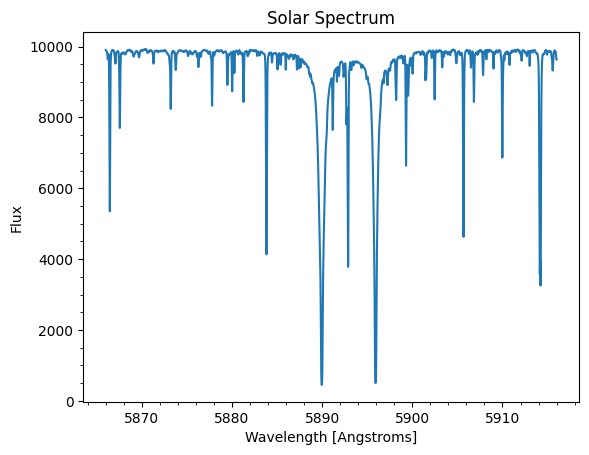

In [ ]:
# Raw Plot
fig, ax = plt.subplots()
ax.plot(df['wavelength'], df['flux'])
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux')
ax.set_title('Solar Spectrum')
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(500))
plt.show()

To begin finding the sodium lines however, we must normalize the plot for the spectrum to look better. To do this, all we must do is take the y-axis of the above plot, and divide it by $10^{-4}$. We do this below.

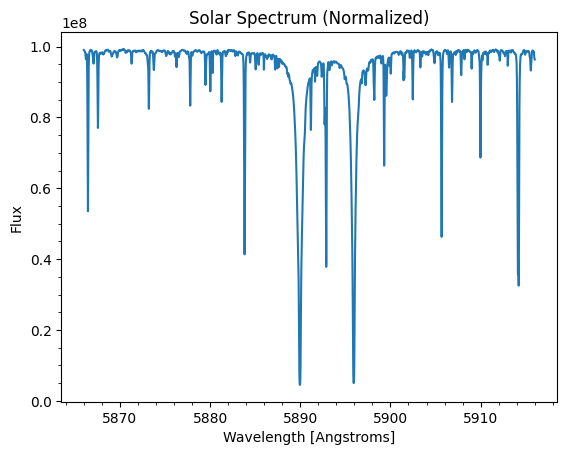

In [ ]:
# Normalizing datapoints in datafile
norm_fl = df['flux'] / 10**(-4)
# Normalized Plot
fig, ax = plt.subplots()
ax.plot(df['wavelength'], norm_fl)
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux')
ax.set_title('Solar Spectrum (Normalized)')
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(500/1e-4))
plt.show()

Now that it is normalized, we must take the limit of this spectrum to include the Sodium Doublet lines, which are of $5890$ and $5896$ Angstroms respectively. We take these limits below.

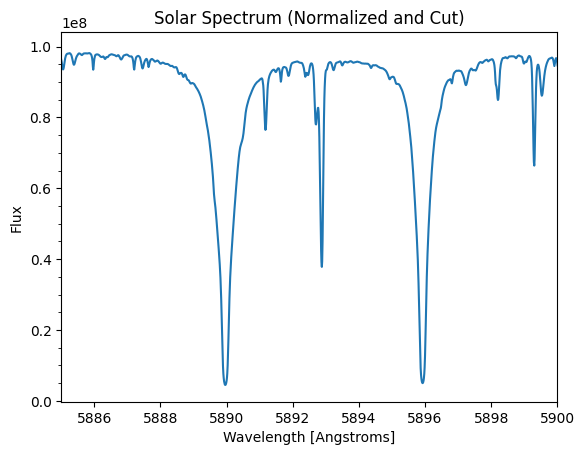

In [ ]:
# Normalized and Cut Plot
fig, ax = plt.subplots()
ax.plot(df['wavelength'], norm_fl)
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux')
ax.set_title('Solar Spectrum (Normalized and Cut)')
ax.set_xlim(5885, 5900)
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(500/1e-4))
plt.show()

Now that we have the Doublet lines in closer view, we can now solve for the equivalent widths of one line. For this, we will be taking the equivalent width of the Doublet Line of $5896 \ Å$. To do this effectively, we must make a rectangle to take the equivalent width from. We will do this by going $± 2.5 Å$ from the $5896 \ Å$ line. This is better represented below.

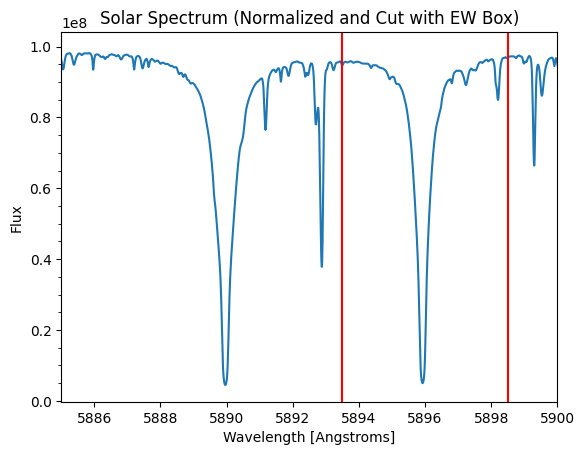

In [ ]:
# Rectangle Width
line1 = 5896 + 2.5
line2 = 5896 - 2.5
# Normalized, Cut, and Boxed Plot
fig, ax = plt.subplots()
ax.plot(df['wavelength'], norm_fl)
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux')
ax.set_title('Solar Spectrum (Normalized and Cut with EW Box)')
ax.axvline(line1, 0, 1, color = "red")
ax.axvline(line2, 0, 1, color = "red")
ax.set_xlim(5885, 5900)
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(500/1e-4))
plt.show()

With these values, we can now take the width of this rectangle and utilize this equation:
$$
ew = ∫(1-F_λ)⋅ F_{λ_{low}} \ dλ
$$
where $F_λ$ is the Normalized Flux of the spectrum, and $F_{λ_{low}}$ is the lowest point on the spectrum.
We use this equation in the code below.

In [ ]:
# Use np.where to find the range of the box
f_l = np.where((df["wavelength"] < line1) & (df["wavelength"] > line2))[0]

# Use np.median and np.diff to find the lowest point in the equation
f_low = np.median(np.diff(df["wavelength"][f_l]))

# Take sum of flux function by 10^4 because original flux is 10^4, and then multiply
# difference by lowest point in the flux function
ew = np.sum(1e4 - df["flux"][f_l]) * f_low / 1e4

print("Equivalent width of 5896 Sodium line =", ew , "Angstroms")

Equivalent width of 5896 Sodium line = 0.6987110000152513 Angstroms


In [ ]:
# Same as above code, but done with 5890 Angstrom line to check validity
# Still uses + 2.5 and - 2.5 Angstrom box width
f_l = np.where((df["wavelength"] < 5892.5) & (df["wavelength"] > 5887.5))[0]

f_low = np.median(np.diff(df["wavelength"][f_l]))
ew = np.sum(1e4 - df["flux"][f_l]) * f_low / 1e4
print("Equivalent width of 5896 Sodium line =", ew , "Angstroms")

Equivalent width of 5896 Sodium line = 0.8346720000182191 Angstroms


With this equation complete, we now have our equivalent width of the $5896 $ Å Sodium line which is $0.6987 $ Å.

# 2. Find Number Density of Na atoms in Ground State based on growth curve plot.

In this section, we will be finding the Numbery Density of Sodium atoms in the Ground State.

To start this, we must first utilize a growth curve plot based on the equivalent width of the spectrum lines we use. The growth curve plot for this spectrum is below.

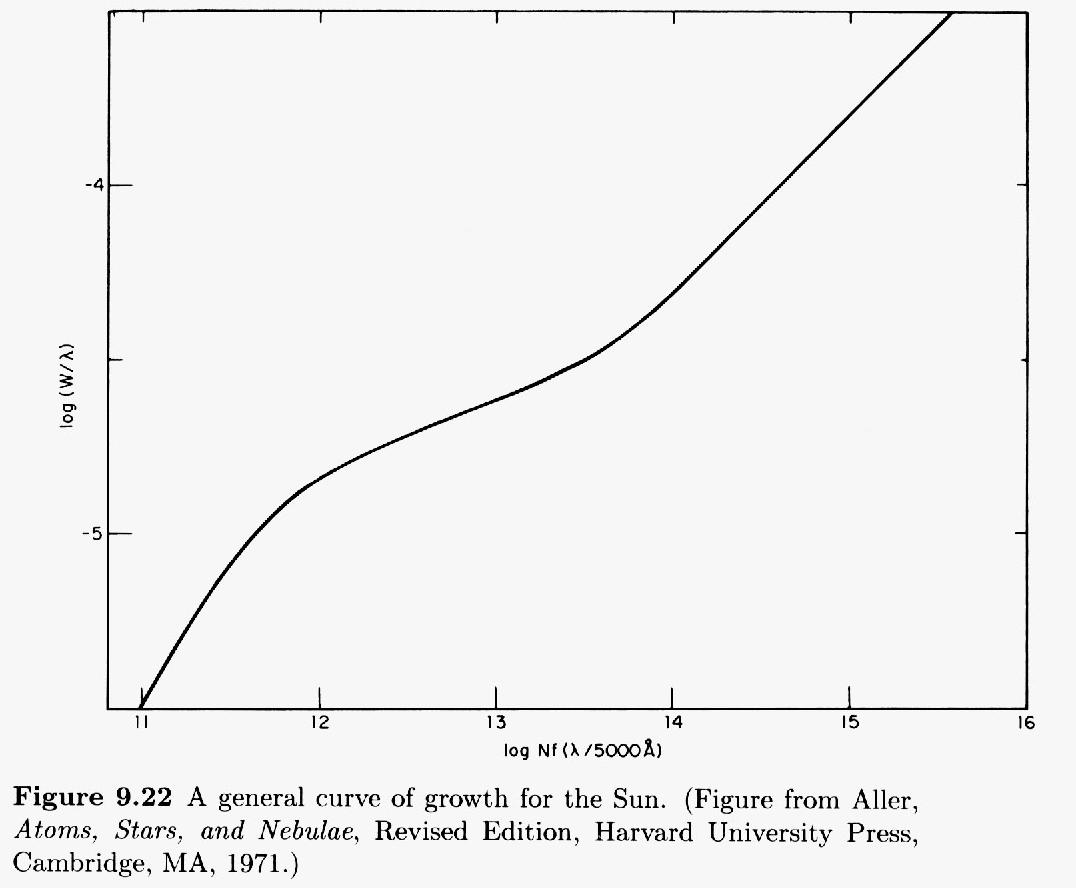

Now, with the equivalent width of our $5896$ Å Sodium line, we can use this to calculate the y-axis value we have for our value, and then approximate our column density via the x-axis of this plot.

To do this, we must find the y-axis value we need for the plot. The equation for the y-axis is pretty self explanatory:
$
y = \log{(\frac{W}{λ})}
$
where $W$ is the equivalent width and $λ$ is the wavelength of the equivalent width.
We solve this below.

In [ ]:
# Constants
W = 0.698 * u.AA
λ = 5896 * u.AA

# Equation
y = np.log10(W/λ)

print("The y-axis value is", y)

The y-axis value is -3.926702052227834


In [ ]:
# Constants
W = 0.834 * u.AA
λ = 5890 * u.AA

# Equation
y = np.log10(W/λ)

print("The y-axis value is", y)

The y-axis value is -3.848949244149363


With this value, we can approximate the x-axis on the growth plot. We find that the corresponding value on the x-axis is $\log{Nf(λ/5000Å)} ∼ 14.65$.

With this value found, we can reverse engineer the x-axis equation to find the Number density $N$ of the $5896$ Å sodium line.

The number density using this equation reversed is
$$
N_1 = \frac{5000 Å ⋅ 10^{x}}{λf}
$$
where $x$ is the x-axis value found, $λ$ is the wavelength, and $f$ is the oscillator strength, which we assume to be 0.3199 according to [this paper](https://steck.us/alkalidata/sodiumnumbers.1.6.pdf). We use this equation in the code below.

In [ ]:
# Constants
x = 14.65
l = 5896 * u.AA
f = 0.3199

# Equation
N = (5000 * u.AA * 10**x)/(l*f)

# Solution
print("The Number Density is [in 10^15] =", N * 1e-15)

The Number Density is [in 10^15] = 1.1841270151601488


And so, the Number Density of the Sodium Line $5896$ Å is ≈ $1.18* 10^{15}$ atoms/cm$^2$.

# 3. Estimate Ratio of Sodium Atoms in ground state to Sodium Atoms in excited state.

In this section, we will find the approximate ratio of sodium atoms in their 3s energy state and compare it to the 3p energy state.

To do this however, we must first write out the equation we will use to find this ratio. This equation is:
$$
\frac{N_2}{N_1} = \frac{g_2}{g_1}e^{-\frac{E_2-E_1}{kT}}
$$
where $N$ is the number density, $g$ is the number of separate individual states that are degenerate in energy, $E$ is the energy at the state, $k$ is the bolzmann constant, and $T$ is the temperature.

Now, for the variables, we can make a few changes.

$g_1$ and $g_2$, their values will be 2 and 6 respectively, and the change of energy will be the difference between the ground state energy and the excited state energy, $E_2$ being the excited state energy of $-3.04$ and $E_1$ being the ground state energy of $-5.14$. We will assume the $T$ to be the effective temperature of the sun, that being $5780 K$.

And with these values, we can finally solve for the ratio of the sodium atoms in the ground state and excited state. We do this in the code below.

In [ ]:
# Constants
g1 = 2
g2 = 6
k = c.k_B
T = 5780 * u.K
# T = 6000 * u.K
E1 = -5.14 * u.eV
E2 = -3.04 * u.eV

# Equation
ratio = g2/g1 * np.exp(-(E2-E1)/(k*T))
print("The ratio between excited state and ground state densities for Sodium is", ratio)

The ratio between excited state and ground state densities for Sodium is 0.04426494982847722


The Number Density ratio between excited state and ground state Sodium is $0.044$.

# 4. Estimate ratio of Neutral sodium atoms to Ionized sodium atoms via Saha equation.

In this section, we will explore the ratio between neutral sodium and ionized sodium.

To find this ratio, we must use the Saha equation. The equation is
$$
\frac{N_{i+1}}{N_i} = \frac{2kTZ_{i+1}}{P_eZ_i}(\frac{2\pi m_ekT}{h^2})^{3/2}e^{-χ_i/kT}
$$
where $N$ is the number density, $P_e$ is the electron pressure, which is $P_e = n_ekT = 1.0 \ N ⋅ m^{-2}$ , $Z$ is the number of allowable states (partition functions), $m_e$ is the mass of an electron, $k$ is Bolzmann Constant, $T$ is the Temperature, $h$ is the planck constant, and $χ$ is the excitation energy.

We can make a few assumptions given us using Sodium atoms in the sun for our values. Remembering the previous section, the effective temperature of the Sun was $5780 K$. We already know that the electron pressure is $1.0 \ N ⋅ m^{-2}$, so that is figured out. We can make $χ$ to be $5.1$ eV for the sodium line only. We will also make $Z_i = 2.4$ and $Z_{i+1} = 1.0$ for the sodium line only.  The rest of these values are constants.

With these variables in place, we can solve the equation in the code below.

In [ ]:
# Constants
k = c.k_B
T = 5780 * u.K
P_e = 1.0 * (u.N / u.m**2)
m_e = c.m_e
h = c.h
X = 5.1 * u.eV
Z_i = 2.4
Z_i2 = 1.0

# Equation
ratio = (2*k*T*Z_i2)/(P_e*Z_i)*(2*np.pi*m_e*k*T/h**2)**(3/2)*np.exp(-X/(k*T))
print("The Number Density ratio between neutral and ionized sodium atoms is", round(ratio.value))

The Number Density ratio between neutral and ionized sodium atoms is 2522


The ratio is ≅ 2500 Ionized atoms per Neutral atom.


What this solution tells us is that there are $≅ 2500$ ionized sodium atoms for every $1$ neutral atom in the Sun.

# 5. Compute Total Column Density of Sodium Atoms in Sun's Photosphere.

In this section, we will compute the total column density of sodium atoms in the sun's photosphere based on our two previous ratios as well as our number density of the sodium doublet line $5896$ Å.

To do this, we must first show the equation we will use to solve the total column density. The equation is
$$
N = N_1 (1+\frac{N_2}{N_1})(1+\frac{N_{i+1}}{N_i})
$$

where $N_1$ is the number density of the ground state, $\frac{N_2}{N_1}$ is the ratio between the number density of the excited state and the ground state, and $\frac{N_{i+1}}{N_i}$ is the ratio between the number density of ionized atoms and the number density of neutral atoms.

Since we have already found these values in the previous sections, I will not show these values in these markdown cells. I will show them in the code below to solve the equation.

In [ ]:
# Constants
N_1 = 1.18 * 10**15 * (u.cm**(-2))
N_21 = 0.0442
N_i21 = 2522

N = N_1 * (1 + N_21) * (1 + N_i21)
print("The Total Column Density of Sodium Atoms in the Sun's Photosphere [in 10^18] = ", N.value * 1e-18, "atoms / cm^2")

The Total Column Density of Sodium Atoms in the Sun's Photosphere [in 10^18] =  3.108729588 atoms / cm^2


The result shows the total column density of sodium atoms in the sun's photosphere being $ ≈ 3.11 * 10^{18}$ atoms / cm$^2$ using the $5896$ Å sodium doublet line.

# 6. Compare to Hydrogen in Physicist and Astronomer Terminology

In this section, we will compare our column density to the column density of Hydrogen, and answer in terms of Physicist and Astonomer terminology.

To do this, we are given the column density of hydrogen atoms, $6.6*10^{23}$ atoms / cm$^2$. We are to use this to compare our own answer from the previous section.

This is done by merely taking the ratio of sodium to hydrogen for the Physicist terminology. We do this below.

In [ ]:
# Constants
N_sod = 3.11 * 10**18 * (u.cm**(-2))
N_hyd = 6.6 * 10**23 * (u.cm**(-2))
# Equation
ratio = N_sod/N_hyd
print("The abundance of Sodium relative to Hydrogen is ", ratio)

The abundance of Sodium relative to Hydrogen is  4.7121212121212126e-06


The result shows the Physicist's terminology of the abundance of Sodium relative to Hydrogen which is $4.7 * 10^{-6}$.

Next we will do an Astronomer's terminology.

For this, we must split it into two parts. The first is the Astronomers working with galaxies. The equation they use for their abundances is
$$
12 + \log{(N_x/N_H)}
$$
where $x$ is the mass density of a given element and $H$ is the mass density of Hydrogen.

We can replace the mass densities of $x$ with the column density, which should allow us to get a similar value to . We do this in the code below.

In [ ]:
# Equation
astro_gal = 12 + np.log10(N_sod/ N_hyd)

print("The abundance of Sodium relative to Hydrogen is ", astro_gal)

The abundance of Sodium relative to Hydrogen is  6.673216453484969


According to the result, the Astronomer working on galaxys' terminology shows the abundance of Sodium to be $6.67$.

  Comparing our results to the actual sodium abundance line given in [this paper](https://www.google.com/url?q=https%3A%2F%2Fpar.nsf.gov%2Fservlets%2Fpurl%2F10036398), we can see that we are off by less than 0.5 values from the log.
  
  This is likely due to the fact that we are using the second line of Sodium, the Na II line rather than the common Na I line that most values are calculated off of. This is, in my opinion, the main reasoning as to why our answer is off by $≈ 0.37$.

The second part is the Astronomers working with stars. The equation they use for their abundances is
$$
[Na/H]= \log{\frac{N_x/N_H}{(N_x/N_H)_⊙}}
$$
where $N_x$ is the number density of a given element, $N_H$ is the number density of Hydrogen, and the ⊙ symbol represents the ratio of number densities within the sun.

Due to us working with a spectrum of the sun's photosphere, it seems rather obvious that our solution would be $0.0$, however we will run with the equation in the code below just to be consistent with the previous two answers.

In [ ]:
# Both Top and Bot variables will be the same because of us working compared to
# the sun when our values are from the sun
Top = N_sod / N_hyd
Bot = N_sod / N_hyd

astro_star = np.log10(Top/Bot)
print("The abundance of Sodium relative to Hydrogen is ", astro_star)

The abundance of Sodium relative to Hydrogen is  0.0


The result shows that according to Astronomers working with stars, the abundance of Sodium compared to Hydrogen is $0.0$.